# HASHED VS NATURAL USERID GRAPH


In [14]:
import zipfile
import pandas as pd

# Correct the path to the zip file
path1 = "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_china_052020_china_052020_users_csv_hashed.zip"


# Create a set to store userids
integer_userids = set()
string_userids = set()

# Create a zip object
with zipfile.ZipFile(path1, 'r') as zObject:
    # List the contents of the zip file
    for member in zObject.namelist():
        if member.endswith(".csv"):
            df = pd.read_csv(zObject.open(member))

            # Check the type of userid
            for row in df['userid']:
                if pd.notnull(row):
                    try:
                        int(row)  # try to convert to integer
                        integer_userids.add(row)
                    except ValueError:  # if it raises an error, it's a string
                        string_userids.add(row)

# Total count of unique userids
total_count = len(string_userids) + len(integer_userids)

print(f'Total count of unique userids: {total_count}')
print(f'The number of string userids: {len(string_userids)}')
print(f'The number of integer userids: {len(integer_userids)}')



Total count of unique userids: 23750
The number of string userids: 23750
The number of integer userids: 0


In [8]:
import zipfile
import pandas as pd

# Correct the path to the zip file
path1 = "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip"


# Empty lists to store userids
string_userids = []
integer_userids = []

# Create a zip object
with zipfile.ZipFile(path1, 'r') as zObject:

    # List the contents of the zip file
    for member in zObject.namelist():
        if member.endswith(".csv"):
            df = pd.read_csv(zObject.open(member))

            # Check the type of userid
            for row in df['userid']:
                if pd.notnull(row):
                    if isinstance(row, int):
                        integer_userids.append(row)
                    elif isinstance(row, str):
                        string_userids.append(row)

# Remove duplicates from both lists
string_userids = list(set(string_userids))
integer_userids = list(set(integer_userids))

# Total count of unique userids
total_count = len(string_userids) + len(integer_userids)

print(f'Total count of unique userids: {total_count}')
print(f'The number of string userids: {len(string_userids)}')
print(f'The number of integer userids: {len(integer_userids)}')


/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/390435902.py:18: DtypeWarning: Columns (15,19) have mixed typ

Total count of unique userids: 6270
The number of string userids: 6270
The number of integer userids: 0


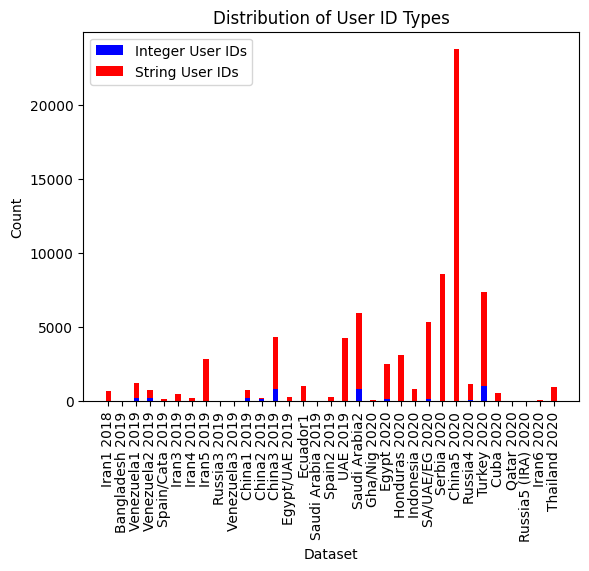

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: 'userid'
Dataset: Iran2 2019, Error: 'userid'
Dataset: Russia2 2019, Error: 'userid'
Dataset: Armenia 2020, Error: File is not a zip file
Dataset: Russia6 (GRU) 2020, Error: File is not a zip file
Dataset: Russia7 (IRA3) 2020, Error: File is not a zip file
Dataset: Iran7 2020, Error: File is not a zip file
Dataset: China6 2021, Error: File is not a zip file
Dataset: China7 2021, Error: File is not a zip file
Dataset: Mexico 2021, Error: File is not a zip file
Dataset: Russia8 2021, Error: File is not a zip file
Dataset: Russia9 2021, Error: File is not a zip file
Dataset: Tanzania 2021, Error: File is not a zip file
Dataset: Uganda 2021, Error: File is not a zip file
Dataset: Venezuela4 2021, Error: File is not a zip file


In [30]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

def process_dataset(path):
    # Create a set to store userids
    integer_userids = set()
    string_userids = set()

    # Create a zip object
    with zipfile.ZipFile(path, 'r') as zObject:
        # List the contents of the zip file
        for member in zObject.namelist():
            if member.endswith(".csv"):
                df = pd.read_csv(zObject.open(member))

                # Check the type of userid
                for row in df['userid']:
                    if pd.notnull(row):
                        try:
                            int(row)  # try to convert to integer
                            integer_userids.add(row)
                        except ValueError:  # if it raises an error, it's a string
                            string_userids.add(row)

    # Total count of unique userids
    total_count = len(string_userids) + len(integer_userids)

    return total_count, len(string_userids), len(integer_userids)


# Dictionary of paths to your datasets and their labels
datasets = {
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/ira_users_csv_hashed.zip": "Russia1 (IRA) 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/iranian_tweets_csv_hashed.zip": "Iran1 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/bangladesh_201901_1_users_csv_hashed.zip": "Bangladesh 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/iran_201901_1_users_csv_hashed.zip": "Iran2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/russia_201901_1_users_csv_hashed.zip": "Russia2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_1_users_csv_hashed.zip": "Venezuela1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_2_users_csv_hashed.zip": "Venezuela2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/catalonia_201906_1_users_csv_hashed.zip": "Spain/Cata 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_1_users_csv_hashed.zip": "Iran3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_2_users_csv_hashed.zip": "Iran4 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_3_users_csv_hashed.zip":"Iran5 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/russia_201906_1_users_csv_hashed.zip":"Russia3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/venezuela_201906_1_users_csv_hashed.zip": "Venezuela3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_1_users_csv_hashed.zip": "China1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_2_users_csv_hashed.zip": "China2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/china_082019_3_users_csv_hashed.zip":"China3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/egypt_uae_082019_1_users_csv_hashed.zip":"Egypt/UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/hashed_2019_08_ecuador_082019_1_ecuador_082019_1_users_csv_hashed.zip":"Ecuador1",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/saudi_arabia_082019_1_users_csv_hashed.zip":"Saudi Arabia 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/spain_082019_1_users_csv_hashed.zip":"Spain2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/uae_082019_1_users_csv_hashed.zip":"UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201912/hashed_2019_11_saudi_arabia_112019_saudi_arabia_112019_users_csv_hashed.zip":"Saudi Arabia2",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202003/hashed_2020_03_032020_users_csv_hashed.zip":"Gha/Nig 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_egypt_022020_egypt_022020_users_csv_hashed.zip":"Egypt 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_honduras_022020_honduras_022020_users_csv_hashed.zip": "Honduras 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_indonesia_022020_indonesia_022020_users_csv_hashed.zip":"Indonesia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_sa_eg_ae_022020_sa_eg_ae_022020_users_csv_hashed.zip":"SA/UAE/EG 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_serbia_022020_serbia_022020_users_csv_hashed.zip":"Serbia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_china_052020_china_052020_users_csv_hashed.zip":"China5 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_russia_052020_russia_052020_users_csv_hashed.zip":"Russia4 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_users_csv_hashed.zip":"Turkey 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_cuba_082020_cuba_082020_users_csv_hashed.zip":"Cuba 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_qatar_082020_qatar_082020_users_csv_hashed.zip":"Qatar 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_ira_092020_ira_092020_users_csv_hashed.zip":"Russia5 (IRA) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_iran_092020_iran_092020_users_csv_hashed.zip":"Iran6 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_thailand_092020_thailand_092020_users_csv_hashed.zip":"Thailand 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_armenia_202012_armenia_202012_users_csv_hashed.csv":"Armenia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_GRU_202012_GRU_202012_users_csv_hashed.csv":"Russia6 (GRU) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_IRA_202012_IRA_202012_users_csv_hashed.csv":"Russia7 (IRA3) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_iran_202012_iran_202012_users_csv_hashed.csv":"Iran7 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNCC_0621_CNCC_0621_users_csv_hashed.csv":"China6 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNHU_0621_CNHU_0621_users_csv_hashed.csv":"China7 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_MX_0621_MX_0621_users_csv_hashed.csv":"Mexico 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_REA_0621_REA_0621_users_csv_hashed.csv":"Russia8 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_RNA_0621_RNA_0621_users_csv_hashed.csv":"Russia9 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Tanzania_0621_Tanzania_0621_users_csv_hashed.csv":"Tanzania 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_uganda_0621_uganda_0621_users_csv_hashed.csv":"Uganda 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Venezuela_0621_Venezuela_0621_users_csv_hashed.csv":"Venezuela4 2021",


}

# Prepare the data for the plot
labels = []
string_counts = []
integer_counts = []
failed_datasets = []

for path, label in datasets.items():
    try:
        total_count, string_count, integer_count = process_dataset(path)
        labels.append(label)  # Use label from dictionary
        string_counts.append(string_count)
        integer_counts.append(integer_count)
        
        # Uncomment these lines to print the counts for each dataset
        # print(f'Dataset: {label}')
        # print(f'Total count of unique userids: {total_count}')
        # print(f'The number of string userids: {string_count}')
        # print(f'The number of integer userids: {integer_count}')
        # print()
    except Exception as e:
        failed_datasets.append((label, str(e)))

# Generate the plot
x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Integer User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='String User IDs', color='r', bottom=integer_counts, align='center')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()

# Print any datasets that failed to process
if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')


In [20]:



import zipfile
import pandas as pd

# Correct the path to the zip file
path1 = "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_2_users_csv_hashed.zip"

# Create a set to store userids
integer_userids = set()
string_userids = set()

# Create a zip object
with zipfile.ZipFile(path1, 'r') as zObject:
    # List the contents of the zip file
    for member in zObject.namelist():
        if member.endswith(".csv"):
            df = pd.read_csv(zObject.open(member))

            # Check the type of userid
            for row in df['userid']:
                if pd.notnull(row):
                    try:
                        int(row)  # try to convert to integer
                        integer_userids.add(row)
                    except ValueError:  # if it raises an error, it's a string
                        string_userids.add(row)

# Total count of unique userids
total_count = len(string_userids) + len(integer_userids)

print(f'Total count of unique userids: {total_count}')
print(f'The number of string userids: {len(string_userids)}')
print(f'The number of integer userids: {len(integer_userids)}')


Total count of unique userids: 755
The number of string userids: 567
The number of integer userids: 188


/tmp/ipykernel_3424488/848312512.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/848312512.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/848312512.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/848312512.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_3424488/848312512.py:18: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))


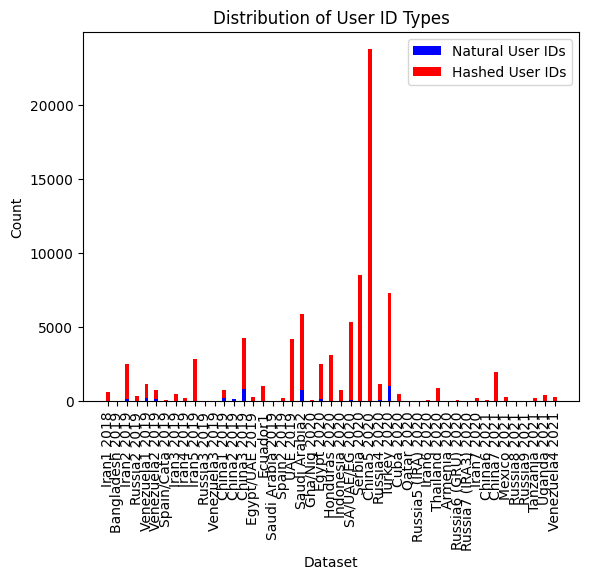

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


In [33]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_dataset(path):
    # Create a set to store userids
    integer_userids = set()
    string_userids = set()

    # Check the file extension
    ext = os.path.splitext(path)[1]
    if ext == ".zip":
        # It's a zip file
        with zipfile.ZipFile(path, 'r') as zObject:
            for member in zObject.namelist():
                if member.endswith(".csv"):
                    df = pd.read_csv(zObject.open(member))
                    for row in df['userid']:
                        if pd.notnull(row):
                            try:
                                int(row)  # try to convert to integer
                                integer_userids.add(row)
                            except ValueError:  # if it raises an error, it's a string
                                string_userids.add(row)
    elif ext == ".csv":
        # It's a csv file
        df = pd.read_csv(path)
        for row in df['userid']:
            if pd.notnull(row):
                try:
                    int(row)  # try to convert to integer
                    integer_userids.add(row)
                except ValueError:  # if it raises an error, it's a string
                    string_userids.add(row)

    # Total count of unique userids
    total_count = len(string_userids) + len(integer_userids)

    return total_count, len(string_userids), len(integer_userids)

# Dictionary of paths to your datasets and their labels
datasets = { "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/ira_tweets_csv_hashed.zip": "Russia1 (IRA) 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/iranian_tweets_csv_hashed.zip": "Iran1 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/bangladesh_201901_1_users_csv_hashed.zip": "Bangladesh 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/iran_201901_1_tweets_csv_hashed.zip": "Iran2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/russia_201901_1_tweets_csv_hashed.zip": "Russia2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_1_users_csv_hashed.zip": "Venezuela1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_2_users_csv_hashed.zip": "Venezuela2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/catalonia_201906_1_users_csv_hashed.zip": "Spain/Cata 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_1_users_csv_hashed.zip": "Iran3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_2_users_csv_hashed.zip": "Iran4 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_3_users_csv_hashed.zip":"Iran5 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/russia_201906_1_users_csv_hashed.zip":"Russia3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/venezuela_201906_1_users_csv_hashed.zip": "Venezuela3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_1_users_csv_hashed.zip": "China1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_2_users_csv_hashed.zip": "China2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/china_082019_3_users_csv_hashed.zip":"China3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/egypt_uae_082019_1_users_csv_hashed.zip":"Egypt/UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/hashed_2019_08_ecuador_082019_1_ecuador_082019_1_users_csv_hashed.zip":"Ecuador1",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/saudi_arabia_082019_1_users_csv_hashed.zip":"Saudi Arabia 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/spain_082019_1_users_csv_hashed.zip":"Spain2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/uae_082019_1_users_csv_hashed.zip":"UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201912/hashed_2019_11_saudi_arabia_112019_saudi_arabia_112019_users_csv_hashed.zip":"Saudi Arabia2",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202003/hashed_2020_03_032020_users_csv_hashed.zip":"Gha/Nig 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_egypt_022020_egypt_022020_users_csv_hashed.zip":"Egypt 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_honduras_022020_honduras_022020_users_csv_hashed.zip": "Honduras 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_indonesia_022020_indonesia_022020_users_csv_hashed.zip":"Indonesia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_sa_eg_ae_022020_sa_eg_ae_022020_users_csv_hashed.zip":"SA/UAE/EG 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_serbia_022020_serbia_022020_users_csv_hashed.zip":"Serbia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_china_052020_china_052020_users_csv_hashed.zip":"China5 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_russia_052020_russia_052020_users_csv_hashed.zip":"Russia4 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_users_csv_hashed.zip":"Turkey 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_cuba_082020_cuba_082020_users_csv_hashed.zip":"Cuba 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_qatar_082020_qatar_082020_users_csv_hashed.zip":"Qatar 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_ira_092020_ira_092020_users_csv_hashed.zip":"Russia5 (IRA) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_iran_092020_iran_092020_users_csv_hashed.zip":"Iran6 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_thailand_092020_thailand_092020_users_csv_hashed.zip":"Thailand 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_armenia_202012_armenia_202012_users_csv_hashed.csv":"Armenia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_GRU_202012_GRU_202012_users_csv_hashed.csv":"Russia6 (GRU) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_IRA_202012_IRA_202012_users_csv_hashed.csv":"Russia7 (IRA3) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_iran_202012_iran_202012_users_csv_hashed.csv":"Iran7 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNCC_0621_CNCC_0621_users_csv_hashed.csv":"China6 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNHU_0621_CNHU_0621_users_csv_hashed.csv":"China7 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_MX_0621_MX_0621_users_csv_hashed.csv":"Mexico 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_REA_0621_REA_0621_users_csv_hashed.csv":"Russia8 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_RNA_0621_RNA_0621_users_csv_hashed.csv":"Russia9 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Tanzania_0621_Tanzania_0621_users_csv_hashed.csv":"Tanzania 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_uganda_0621_uganda_0621_users_csv_hashed.csv":"Uganda 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Venezuela_0621_Venezuela_0621_users_csv_hashed.csv":"Venezuela4 2021",




}

# Prepare the data for the plot
labels = []
string_counts = []
integer_counts = []
failed_datasets = []

for path, label in datasets.items():
    try:
        total_count, string_count, integer_count = process_dataset(path)
        labels.append(label)  # Use label from dictionary
        string_counts.append(string_count)
        integer_counts.append(integer_count)
    except Exception as e:
        failed_datasets.append((label, str(e)))

# Generate the plot
x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()

# Print any datasets that failed to process
if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')


In [ ]:
# Generate the plot
x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()

# Print any datasets that failed to process
if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')

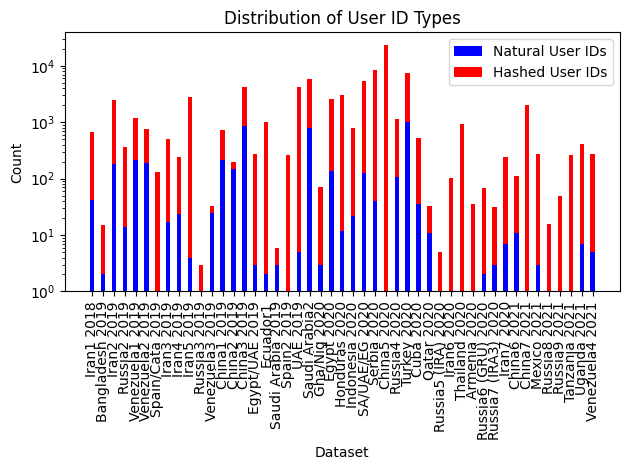

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


In [34]:
# Generate the plot
x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')

# Set the scale to logarithmic
plt.yscale('log')

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')

# Increase space between labels
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()

plt.legend()
plt.show()

# Print any datasets that failed to process
if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')


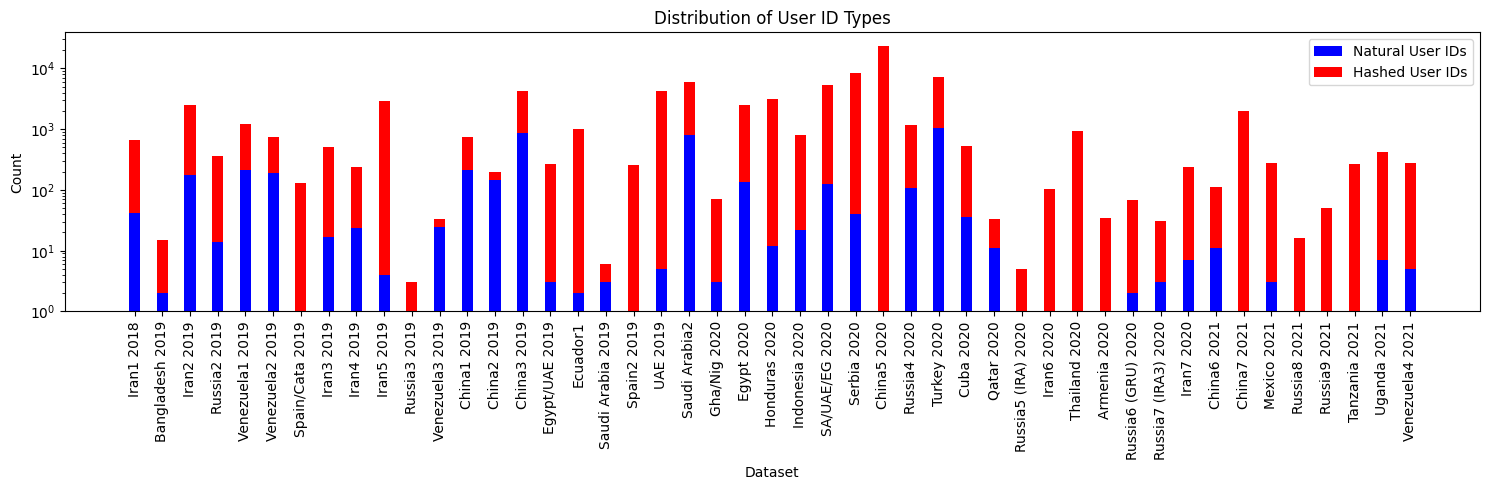

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


In [37]:
# Generate the plot
plt.figure(figsize=(15, 5))  # Adjust figure size
x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')

# Set the scale to logarithmic
plt.yscale('log')

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')

# Increase space between labels
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()

plt.legend()

plt.savefig('ID_distribution.pdf')
plt.show()

# Print any datasets that failed to process
if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')


In [8]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_dataset(path):
    integer_userids = set()
    string_userids = set()

    ext = os.path.splitext(path)[1]
    if ext == ".zip":
        with zipfile.ZipFile(path, 'r') as zObject:
            for member in zObject.namelist():
                if member.endswith(".csv"):
                    df = pd.read_csv(zObject.open(member))
                    for row in df['userid']:
                        if pd.notnull(row):
                            try:
                                int(row)
                                integer_userids.add(row)
                            except ValueError:
                                string_userids.add(row)
    elif ext == ".csv":
        df = pd.read_csv(path)
        for row in df['userid']:
            if pd.notnull(row):
                try:
                    int(row)
                    integer_userids.add(row)
                except ValueError:
                    string_userids.add(row)

    total_count = len(string_userids) + len(integer_userids)
    if total_count == 0:
        return total_count, 0, 0, 0  # Avoid division by zero

    string_percentage = (len(string_userids) / total_count) * 100
    return total_count, len(string_userids), len(integer_userids), string_percentage

datasets = {"/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/ira_tweets_csv_hashed.zip": "Russia1 (IRA) 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/iranian_tweets_csv_hashed.zip": "Iran1 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/bangladesh_201901_1_users_csv_hashed.zip": "Bangladesh 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/iran_201901_1_tweets_csv_hashed.zip": "Iran2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/russia_201901_1_tweets_csv_hashed.zip": "Russia2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_1_users_csv_hashed.zip": "Venezuela1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_2_users_csv_hashed.zip": "Venezuela2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/catalonia_201906_1_users_csv_hashed.zip": "Spain/Cata 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_1_users_csv_hashed.zip": "Iran3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_2_users_csv_hashed.zip": "Iran4 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_3_users_csv_hashed.zip":"Iran5 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/russia_201906_1_users_csv_hashed.zip":"Russia3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/venezuela_201906_1_users_csv_hashed.zip": "Venezuela3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_1_users_csv_hashed.zip": "China1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_2_users_csv_hashed.zip": "China2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/china_082019_3_users_csv_hashed.zip":"China3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/egypt_uae_082019_1_users_csv_hashed.zip":"Egypt/UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/hashed_2019_08_ecuador_082019_1_ecuador_082019_1_users_csv_hashed.zip":"Ecuador1",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/saudi_arabia_082019_1_users_csv_hashed.zip":"Saudi Arabia 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/spain_082019_1_users_csv_hashed.zip":"Spain2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/uae_082019_1_users_csv_hashed.zip":"UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201912/hashed_2019_11_saudi_arabia_112019_saudi_arabia_112019_users_csv_hashed.zip":"Saudi Arabia2",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202003/hashed_2020_03_032020_users_csv_hashed.zip":"Gha/Nig 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_egypt_022020_egypt_022020_users_csv_hashed.zip":"Egypt 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_honduras_022020_honduras_022020_users_csv_hashed.zip": "Honduras 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_indonesia_022020_indonesia_022020_users_csv_hashed.zip":"Indonesia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_sa_eg_ae_022020_sa_eg_ae_022020_users_csv_hashed.zip":"SA/UAE/EG 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_serbia_022020_serbia_022020_users_csv_hashed.zip":"Serbia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_china_052020_china_052020_users_csv_hashed.zip":"China5 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_russia_052020_russia_052020_users_csv_hashed.zip":"Russia4 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_users_csv_hashed.zip":"Turkey 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_cuba_082020_cuba_082020_users_csv_hashed.zip":"Cuba 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_qatar_082020_qatar_082020_users_csv_hashed.zip":"Qatar 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_ira_092020_ira_092020_users_csv_hashed.zip":"Russia5 (IRA) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_iran_092020_iran_092020_users_csv_hashed.zip":"Iran6 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_thailand_092020_thailand_092020_users_csv_hashed.zip":"Thailand 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_armenia_202012_armenia_202012_users_csv_hashed.csv":"Armenia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_GRU_202012_GRU_202012_users_csv_hashed.csv":"Russia6 (GRU) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_IRA_202012_IRA_202012_users_csv_hashed.csv":"Russia7 (IRA3) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_iran_202012_iran_202012_users_csv_hashed.csv":"Iran7 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNCC_0621_CNCC_0621_users_csv_hashed.csv":"China6 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNHU_0621_CNHU_0621_users_csv_hashed.csv":"China7 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_MX_0621_MX_0621_users_csv_hashed.csv":"Mexico 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_REA_0621_REA_0621_users_csv_hashed.csv":"Russia8 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_RNA_0621_RNA_0621_users_csv_hashed.csv":"Russia9 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Tanzania_0621_Tanzania_0621_users_csv_hashed.csv":"Tanzania 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_uganda_0621_uganda_0621_users_csv_hashed.csv":"Uganda 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Venezuela_0621_Venezuela_0621_users_csv_hashed.csv":"Venezuela4 2021",


    
}

labels = []
string_counts = []
integer_counts = []
string_percentages = []
failed_datasets = []

for path, label in datasets.items():
    try:
        total_count, string_count, integer_count, string_percentage = process_dataset(path)
        labels.append(label)
        string_counts.append(string_count)
        integer_counts.append(integer_count)
        string_percentages.append(string_percentage)
    except Exception as e:
        failed_datasets.append((label, str(e)))



/tmp/ipykernel_948268/449205080.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/449205080.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/449205080.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/449205080.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/449205080.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))


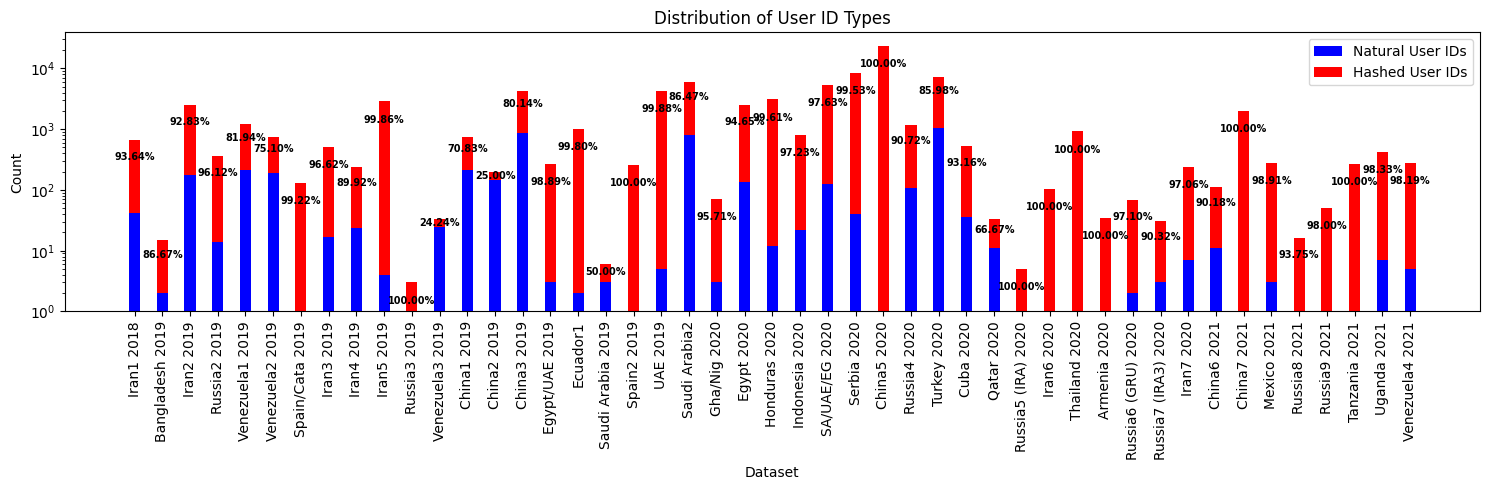

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: Bad CRC-32 for file 'ira_tweets_csv_hashed.csv'


In [10]:
plt.figure(figsize=(15, 5))  # Adjust figure size

x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')

    
# Now in the plotting section:
for i, v in enumerate(string_percentages):
    plt.text(i, integer_counts[i] + string_counts[i] / 2, f"{v:.2f}%", 
             ha='center', va='center', fontweight='bold', color='black', fontsize=7) # changed color and size


plt.yscale('log')

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.savefig('ID_distribution2.pdf')
plt.show()

if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')

/tmp/ipykernel_948268/616215394.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/616215394.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/616215394.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/616215394.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))
/tmp/ipykernel_948268/616215394.py:15: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zObject.open(member))


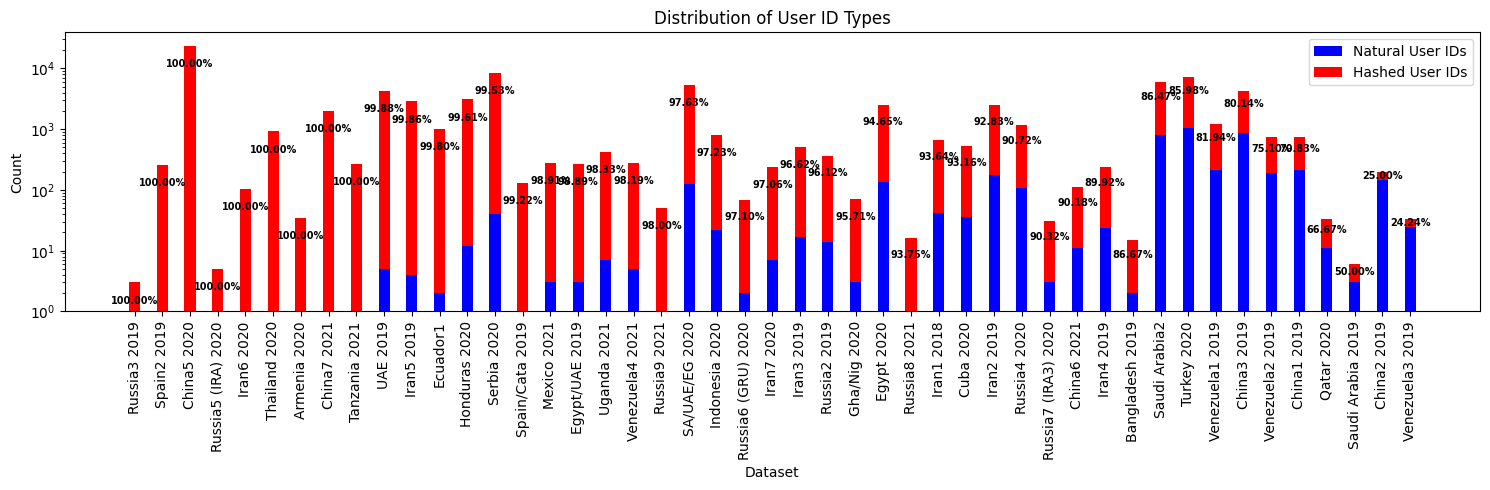

The following datasets failed to process:
Dataset: Russia1 (IRA) 2018, Error: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


In [19]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_dataset(path):
    integer_userids = set()
    string_userids = set()

    ext = os.path.splitext(path)[1]
    if ext == ".zip":
        with zipfile.ZipFile(path, 'r') as zObject:
            for member in zObject.namelist():
                if member.endswith(".csv"):
                    df = pd.read_csv(zObject.open(member))
                    for row in df['userid']:
                        if pd.notnull(row):
                            try:
                                int(row)
                                integer_userids.add(row)
                            except ValueError:
                                string_userids.add(row)
    elif ext == ".csv":
        df = pd.read_csv(path)
        for row in df['userid']:
            if pd.notnull(row):
                try:
                    int(row)
                    integer_userids.add(row)
                except ValueError:
                    string_userids.add(row)

    total_count = len(string_userids) + len(integer_userids)
    if total_count == 0:
        return total_count, 0, 0, 0  # Avoid division by zero

    string_percentage = (len(string_userids) / total_count) * 100
    return total_count, len(string_userids), len(integer_userids), string_percentage

datasets = {"/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/ira_tweets_csv_hashed.zip": "Russia1 (IRA) 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201810/iranian_tweets_csv_hashed.zip": "Iran1 2018",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/bangladesh_201901_1_users_csv_hashed.zip": "Bangladesh 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/iran_201901_1_tweets_csv_hashed.zip": "Iran2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/russia_201901_1_tweets_csv_hashed.zip": "Russia2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_1_users_csv_hashed.zip": "Venezuela1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201901/venezuela_201901_2_users_csv_hashed.zip": "Venezuela2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/catalonia_201906_1_users_csv_hashed.zip": "Spain/Cata 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_1_users_csv_hashed.zip": "Iran3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_2_users_csv_hashed.zip": "Iran4 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/iran_201906_3_users_csv_hashed.zip":"Iran5 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/russia_201906_1_users_csv_hashed.zip":"Russia3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201906/venezuela_201906_1_users_csv_hashed.zip": "Venezuela3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_1_users_csv_hashed.zip": "China1 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201908/china_082019_2_users_csv_hashed.zip": "China2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/china_082019_3_users_csv_hashed.zip":"China3 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/egypt_uae_082019_1_users_csv_hashed.zip":"Egypt/UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/hashed_2019_08_ecuador_082019_1_ecuador_082019_1_users_csv_hashed.zip":"Ecuador1",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/saudi_arabia_082019_1_users_csv_hashed.zip":"Saudi Arabia 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/spain_082019_1_users_csv_hashed.zip":"Spain2 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201909/uae_082019_1_users_csv_hashed.zip":"UAE 2019",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/201912/hashed_2019_11_saudi_arabia_112019_saudi_arabia_112019_users_csv_hashed.zip":"Saudi Arabia2",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202003/hashed_2020_03_032020_users_csv_hashed.zip":"Gha/Nig 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_egypt_022020_egypt_022020_users_csv_hashed.zip":"Egypt 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_honduras_022020_honduras_022020_users_csv_hashed.zip": "Honduras 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_indonesia_022020_indonesia_022020_users_csv_hashed.zip":"Indonesia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_sa_eg_ae_022020_sa_eg_ae_022020_users_csv_hashed.zip":"SA/UAE/EG 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202004/hashed_2020_04_serbia_022020_serbia_022020_users_csv_hashed.zip":"Serbia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_china_052020_china_052020_users_csv_hashed.zip":"China5 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_russia_052020_russia_052020_users_csv_hashed.zip":"Russia4 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_users_csv_hashed.zip":"Turkey 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_cuba_082020_cuba_082020_users_csv_hashed.zip":"Cuba 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_08_qatar_082020_qatar_082020_users_csv_hashed.zip":"Qatar 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_ira_092020_ira_092020_users_csv_hashed.zip":"Russia5 (IRA) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_iran_092020_iran_092020_users_csv_hashed.zip":"Iran6 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202010/hashed_2020_09_thailand_092020_thailand_092020_users_csv_hashed.zip":"Thailand 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_armenia_202012_armenia_202012_users_csv_hashed.csv":"Armenia 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_GRU_202012_GRU_202012_users_csv_hashed.csv":"Russia6 (GRU) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_IRA_202012_IRA_202012_users_csv_hashed.csv":"Russia7 (IRA3) 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202102/hashed_2020_12_iran_202012_iran_202012_users_csv_hashed.csv":"Iran7 2020",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNCC_0621_CNCC_0621_users_csv_hashed.csv":"China6 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_CNHU_0621_CNHU_0621_users_csv_hashed.csv":"China7 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_MX_0621_MX_0621_users_csv_hashed.csv":"Mexico 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_REA_0621_REA_0621_users_csv_hashed.csv":"Russia8 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_RNA_0621_RNA_0621_users_csv_hashed.csv":"Russia9 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Tanzania_0621_Tanzania_0621_users_csv_hashed.csv":"Tanzania 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_uganda_0621_uganda_0621_users_csv_hashed.csv":"Uganda 2021",
    "/ctc/DATASTORE/TwitterReleases/InformationOperations/202112/hashed_2021_12_Venezuela_0621_Venezuela_0621_users_csv_hashed.csv":"Venezuela4 2021",


    
}
labels = []
string_counts = []
integer_counts = []
string_percentages = []
failed_datasets = []

for path, label in datasets.items():
    try:
        total_count, string_count, integer_count, string_percentage = process_dataset(path)
        labels.append(label)
        string_counts.append(string_count)
        integer_counts.append(integer_count)
        string_percentages.append(string_percentage)
    except Exception as e:
        failed_datasets.append((label, str(e)))

# Sorting the data by string_percentages from most to least
zipped_data = list(zip(labels, string_counts, integer_counts, string_percentages))
sorted_data = sorted(zipped_data, key=lambda x: x[3], reverse=True)
labels, string_counts, integer_counts, string_percentages = zip(*sorted_data)

plt.figure(figsize=(15, 5))  # Adjust figure size

x = range(len(labels))
plt.bar(x, integer_counts, width=0.4, label='Natural User IDs', color='b', align='center')
plt.bar(x, string_counts, width=0.4, label='Hashed User IDs', color='r', bottom=integer_counts, align='center')

# Plotting section:
for i, v in enumerate(string_percentages):
    plt.text(i, integer_counts[i] + string_counts[i] / 2, f"{v:.2f}%", 
             ha='center', va='center', fontweight='bold', color='black', fontsize=7)

plt.yscale('log')

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of User ID Types')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
#plt.savefig('ID_distribution2.pdf')
plt.show()

if failed_datasets:
    print('The following datasets failed to process:')
    for dataset, error in failed_datasets:
        print(f'Dataset: {dataset}, Error: {error}')
